## We import the libraries

In [103]:
import numpy  as np
import matplotlib.pyplot  as plt

from sklearn import datasets



In [104]:
## Prepare the data
boston = datasets.load_boston()
print(boston)
print()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [105]:
## check the information of the data
print("Information of the data")
print(boston.keys())
print()
## check the features of the data
print("Features of the data")
print(boston.DESCR)
print()
print("Quantities of the data")
print(boston.data.shape)
print()

Information of the data
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Features of the data
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD

In [106]:
# Check the labels
print("The columns names")
print(boston.feature_names)
print()


The columns names
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']



## Prepare the datw

In [107]:
## We select the data for this algorithm
X_bar = boston.data[:, np.newaxis, 5]
## We define the data
y_bar = boston.target

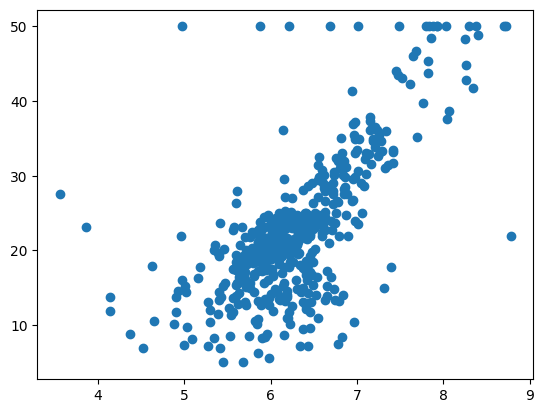

In [108]:
## We graphic it

plt.scatter(X_bar, y_bar)


## Implementation

In [109]:
## We import the module to train it

from   sklearn.model_selection import train_test_split
## We separate the data

X_train, X_test, y_train, y_test =  train_test_split(X_bar,y_bar, test_size=0.2) # 20 % of the data

In [110]:
## Now we import specific the module of this model
from sklearn.ensemble import RandomForestRegressor

## Define the algorithm to use
bar = RandomForestRegressor(n_estimators= 400,max_depth=25) # n_estimators, the number of trees that it is a estimator, and max_depth, the deep of the tree 


In [111]:
## We train it with fit
bar.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=400)

In [112]:
## We make the predict
Y_pred = bar.predict(X_test)

C:\Users\santi\AppData\Local\Temp\ipykernel_21384\2608289413.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid =  np.arange(min(X_test), max(X_test), 0.1) # we use arange , to divide in a uniform way


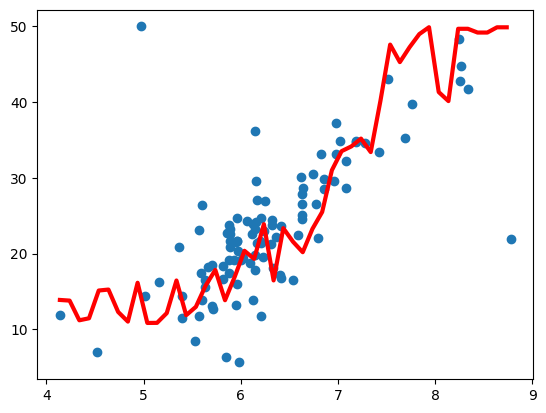

In [113]:
## We graphic the prediction
## We graphic it
X_grid =  np.arange(min(X_test), max(X_test), 0.1) # we use arange , to divide in a uniform way
X_grid  = X_grid.reshape(len(X_grid), 1) #  to give a new form
plt.scatter(X_test,y_test)
plt.plot(X_grid,bar.predict(X_grid), color='red', linewidth=3)

In [114]:
## we calculate the precision of the algorithm

print("The data of this model")
print("The precision is")
print(bar.score(X_train, y_train))

#it's too good this model

The data of this model
The precision is
0.9048102572081188
